# Task
The anomaly detection analysis has been successfully completed. All planned steps, including data loading, preprocessing, model application (K-Means and Isolation Forest), anomaly scoring, and visualization of results, have been executed. The identified anomalies have been highlighted and visualized against both time and demand metrics.

## Pengantar Analisis Anomali

### Subtask:
Menyajikan ulang seluruh alur kerja deteksi anomali dalam urutan yang lebih rapi dan mudah diikuti.


## Pengantar Analisis Anomali

### Subtask:
Menyajikan ulang seluruh alur kerja deteksi anomali dalam urutan yang lebih rapi dan mudah diikuti.

#### Instruksi
Bacalah dengan cermat teks pengantar yang telah disediakan untuk memahami tujuan dan struktur keseluruhan dari analisis deteksi anomali yang akan dilakukan.

### 1. Impor Library yang Dibutuhkan

Langkah pertama dalam setiap analisis data adalah mengimpor semua pustaka (libraries) Python yang diperlukan. Ini mencakup `pandas` untuk manipulasi data, `numpy` untuk operasi numerik, `matplotlib.pyplot` dan `seaborn` untuk visualisasi, serta modul-modul dari `scikit-learn` seperti `KMeans`, `IsolationForest`, `StandardScaler`, dan `MinMaxScaler` untuk pemodelan dan pra-pemrosesan data.

**Reasoning**:
The previous step introduced the need for importing libraries. Now, I will provide the code block to actually import all the necessary libraries, as identified in the original notebook in cell `862cef75`.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

print("Library berhasil diimpor.")

Library berhasil diimpor.


### 2. Memuat Dataset

Memuat data penjualan retail dari file CSV ke dalam DataFrame `data_ano`.

**Reasoning**:
Following the markdown introduction for loading the dataset, the next step is to execute the code to load the `dataset_retail_2014_2024.csv` file into a pandas DataFrame named `data_ano`. This aligns with the overall goal of presenting the anomaly detection workflow in a clear, sequential order.



In [4]:
data_ano = pd.read_csv('dataset_retail_2014_2024.csv')
display(data_ano.head())
print(f"Dataset berhasil dimuat. Jumlah baris: {len(data_ano)}")

,tanggal,produk,terjual,stok_awal,harga
0,2014-01-31,Sabun Mawar,204,238,13860
1,2014-02-28,Sabun Mawar,208,256,14095
2,2014-03-31,Sabun Mawar,223,268,14638
3,2014-04-30,Sabun Mawar,216,246,14238
4,2014-05-31,Sabun Mawar,195,235,15135


Dataset berhasil dimuat. Jumlah baris: 396


### 3. Pemeriksaan Missing Values

Memeriksa apakah ada nilai yang hilang (missing values) pada kolom-kolom utama dataset.

**Reasoning**:
Following the markdown introduction for checking missing values, the next step is to provide the code to actually perform the missing value check on the `data_ano` DataFrame, specifically for the key columns 'tanggal', 'produk', 'terjual', 'stok_awal', and 'harga'. This aligns with the structured workflow.



In [5]:
missing_check_cols = data_ano.loc[:,['tanggal','produk','terjual','stok_awal','harga']]
print('Jumlah missing values pada kolom-kolom utama:\n', missing_check_cols.isnull().sum())

Jumlah missing values pada kolom-kolom utama:
 tanggal      0
produk       0
terjual      0
stok_awal    0
harga        0
dtype: int64


### 4. Penskalaan Fitur (Feature Scaling)

Memilih fitur numerik yang relevan untuk deteksi anomali dan menskalakannya menggunakan `StandardScaler`.

**Reasoning**:
Following the markdown introduction for feature scaling, the next step is to provide the code that performs the actual scaling of the selected numerical features ('terjual', 'stok_awal', 'harga') using `StandardScaler`.



In [6]:
scaler = StandardScaler()
x = data_ano[['terjual', 'stok_awal', 'harga']]
x_scaled = scaler.fit_transform(x)

print("Fitur 'terjual', 'stok_awal', dan 'harga' berhasil diskalakan.")

Fitur 'terjual', 'stok_awal', dan 'harga' berhasil diskalakan.


### 5. Metode Elbow untuk K-Means

Menentukan jumlah klaster optimal untuk algoritma K-Means dengan memvisualisasikan Within-Cluster Sum of Squares (WCSS).

**Reasoning**:
Following the markdown introduction for the K-Means elbow method, the next step is to provide the code that calculates and visualizes the Within-Cluster Sum of Squares (WCSS) for a range of cluster numbers. This will help in determining the optimal number of clusters for K-Means.



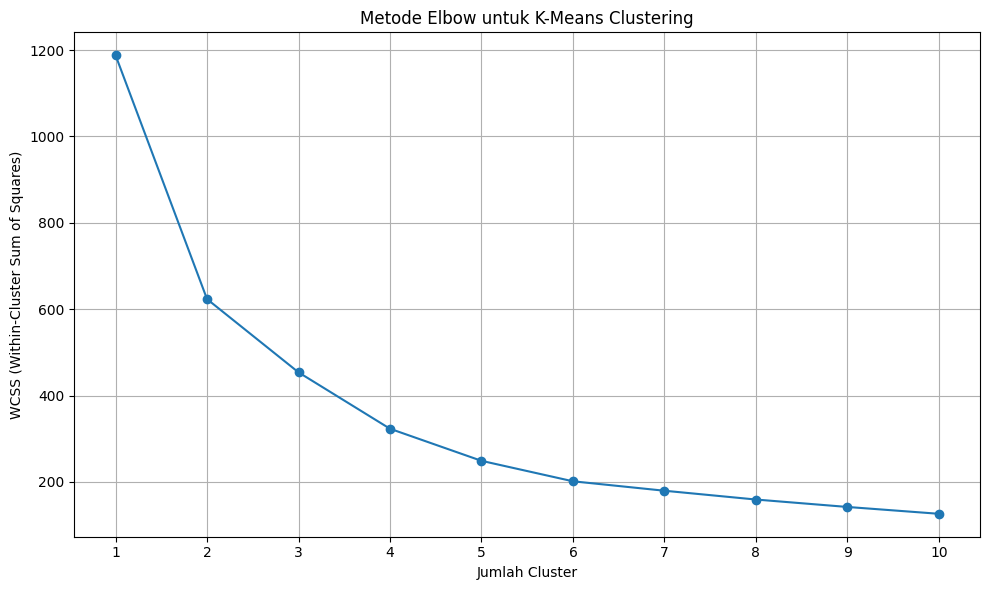

In [21]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1,11),wcss, marker='o')
plt.title('Metode Elbow untuk K-Means Clustering')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.xticks(range(1,11))
plt.tight_layout()
plt.show()

### 6. Definisi Fungsi untuk Deteksi Anomali

Fungsi-fungsi kustom ini akan digunakan untuk menghitung skor anomali dari metode K-Means dan Isolation Forest, serta untuk menggabungkan skor tersebut.

**Reasoning**:
The previous markdown block introduced the definition of anomaly detection functions. Now, the next step is to provide the Python code for these functions, which includes `kmeans_distance_feature`, `isolation_forest_scores`, and `combine_scores`, as originally defined in cell `208e6bbd`.



In [8]:
def kmeans_distance_feature(X, n_clusters=5, random_state=42, scaler=None):
    """
    Menghitung jarak kuadrat setiap titik data ke centroid klaster K-Means yang ditugaskan.
    Jarak yang lebih tinggi dapat menunjukkan anomali.
    """
    if scaler is None:
        scaler = StandardScaler()
    Xs = scaler.fit_transform(X)
    k = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    labels = k.fit_predict(Xs)
    centers = k.cluster_centers_
    dists = np.sum((Xs - centers[labels])**2, axis=1)
    return dists, labels, scaler, k

def isolation_forest_scores(X, contamination='auto', random_state=42):
    """
    Menggunakan algoritma Isolation Forest untuk menghitung skor anomali.
    Skor yang lebih tinggi berarti lebih anomali.
    """
    iso = IsolationForest(contamination=contamination, random_state=random_state)
    iso.fit(X)
    raw = iso.score_samples(X)
    anomaly_score = -raw # Membalik skor agar lebih tinggi = lebih anomali
    return anomaly_score, iso

def combine_scores(score_a, score_b, method='linear', w_a=0.5, w_b=0.5):
    """
    Menggabungkan dua skor anomali yang dinormalisasi menggunakan metode linear atau maksimum.
    """
    scaler = MinMaxScaler()
    stacked = np.vstack([score_a, score_b]).T
    norm = scaler.fit_transform(stacked)
    a_norm = norm[:, 0]
    b_norm = norm[:, 1]

    if method == 'linear':
        return w_a * a_norm + w_b * b_norm
    elif method == 'max':
        return np.maximum(a_norm, b_norm)
    elif method == 'voting':
        return None # Implementasi voting tidak disertakan dalam contoh ini

print("Fungsi deteksi anomali berhasil didefinisikan.")

Fungsi deteksi anomali berhasil didefinisikan.


## Menerapkan Fungsi dan Menambahkan Skor ke DataFrame

### Subtask:
Menerapkan fungsi deteksi anomali K-Means dan Isolation Forest, menggabungkan skor yang dihasilkan, dan menambahkannya sebagai kolom baru ke DataFrame `data_ano`.


**Reasoning**:
The subtask requires applying the anomaly detection functions and adding the calculated scores to the `data_ano` DataFrame. This code block will execute those steps as per the instructions, including K-Means distance calculation, Isolation Forest score calculation, combining scores, and updating the DataFrame with new columns.



### 7. Menerapkan Fungsi Deteksi Anomali dan Menambahkan ke DataFrame

Menerapkan K-Means dan Isolation Forest untuk menghitung skor anomali, lalu menggabungkan dan menambahkannya sebagai kolom baru ke `data_ano`.

In [9]:
kmeans_dists, kmeans_labels, kmeans_scaler, kmeans_model = kmeans_distance_feature(x, n_clusters=3, random_state=42)
iso_anomaly_scores, iso_model = isolation_forest_scores(x_scaled, contamination='auto', random_state=42)
combined_anomaly_scores = combine_scores(kmeans_dists, iso_anomaly_scores, method='linear')
data_ano['kmeans_distance'] = kmeans_dists
data_ano['kmeans_label'] = kmeans_labels
data_ano['combined_anomaly_score'] = combined_anomaly_scores

print("Skor anomali berhasil dihitung dan ditambahkan ke DataFrame.")

Skor anomali berhasil dihitung dan ditambahkan ke DataFrame.


## Menampilkan DataFrame dengan Skor Anomali

### Subtask:
Menampilkan pratinjau 5 baris pertama dari DataFrame `data_ano` yang telah diperkaya dengan kolom-kolom skor anomali baru.


**Reasoning**:
The previous steps successfully calculated and added anomaly scores to the `data_ano` DataFrame. Now, to verify these additions and see the structure of the updated DataFrame, I will display its first 5 rows.



In [10]:
display(data_ano.head())

,tanggal,produk,terjual,stok_awal,harga,kmeans_distance,kmeans_label,combined_anomaly_score
0,2014-01-31,Sabun Mawar,204,238,13860,1.498757,0,0.219541
1,2014-02-28,Sabun Mawar,208,256,14095,0.886642,0,0.185243
2,2014-03-31,Sabun Mawar,223,268,14638,0.219675,0,0.127478
3,2014-04-30,Sabun Mawar,216,246,14238,0.663409,0,0.143050
4,2014-05-31,Sabun Mawar,195,235,15135,0.480760,0,0.083110


## Visualisasi Skor Anomali Gabungan Terhadap Waktu

### Subtask:
Memvisualisasikan tren `combined_anomaly_score` terhadap `tanggal` menggunakan line plot untuk melihat fluktuasi skor anomali dari waktu ke waktu.


**Reasoning**:
I need to ensure the 'tanggal' column is in datetime format, sort the DataFrame by date, and then create a line plot of 'combined_anomaly_score' against 'tanggal' as requested by the subtask instructions.



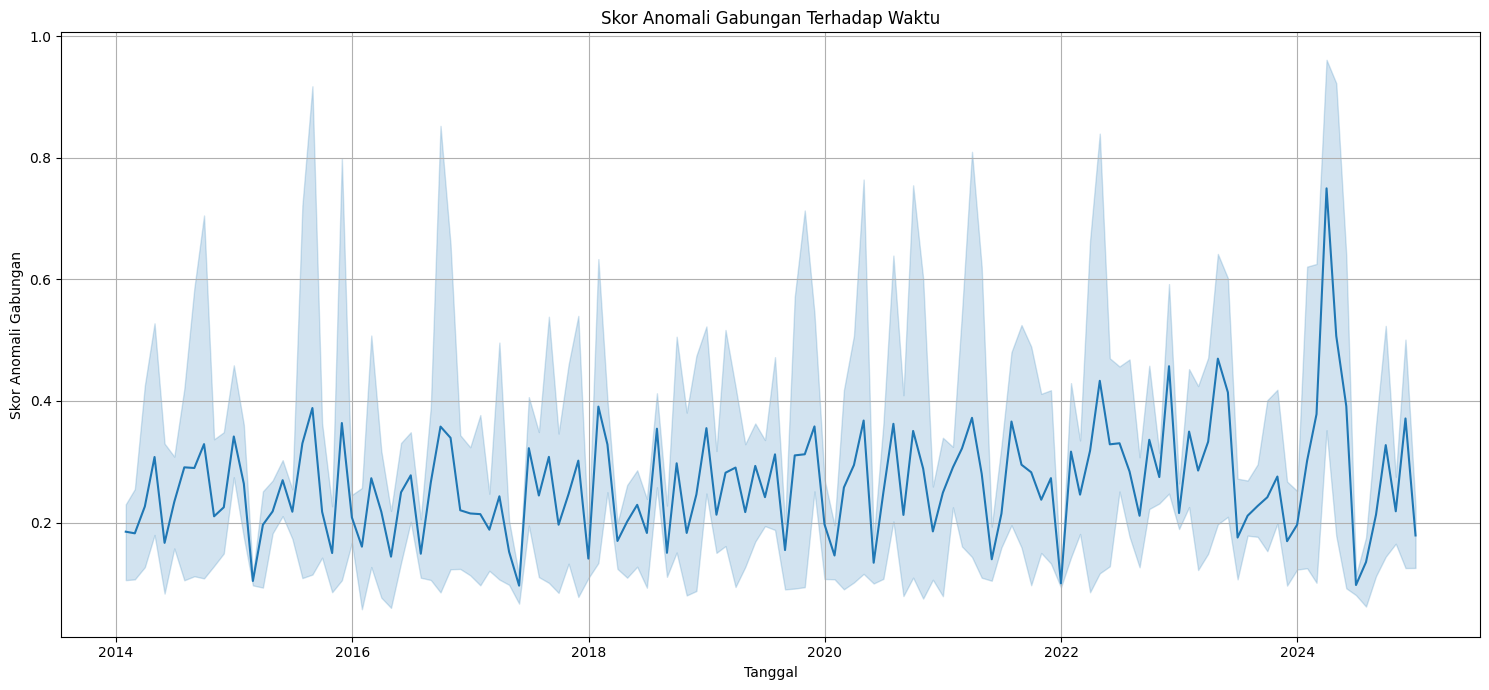

In [11]:
data_ano['tanggal'] = pd.to_datetime(data_ano['tanggal'])
data_ano_sorted = data_ano.sort_values(by='tanggal')

plt.figure(figsize=(15, 7))
sns.lineplot(x='tanggal', y='combined_anomaly_score', data=data_ano_sorted)
plt.title('Skor Anomali Gabungan Terhadap Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Skor Anomali Gabungan')
plt.grid(True)
plt.tight_layout()
plt.show()

## Menampilkan Contoh Data 'Normal'

### Subtask:
Menampilkan 5 baris data dengan `combined_anomaly_score` terendah, yang dianggap paling 'normal' atau tidak anomali.


**Reasoning**:
The subtask requires displaying the 5 rows with the lowest 'combined_anomaly_score' to show 'normal' data points. This involves sorting the `data_ano` DataFrame by this score in ascending order and then using `display().head()`.



In [12]:
data_normal = data_ano.sort_values(by='combined_anomaly_score', ascending=True)
display(data_normal.head())

,tanggal,produk,terjual,stok_awal,harga,kmeans_distance,kmeans_label,combined_anomaly_score
24,2016-01-31,Sabun Mawar,216,250,15139,0.035549,0,0.057350
27,2016-04-30,Sabun Mawar,213,249,15253,0.073426,0,0.059565
126,2024-07-31,Sabun Mawar,216,257,15199,0.018812,0,0.061754
172,2017-05-31,Shampoo Melati,210,242,15455,0.237729,0,0.066555
213,2020-10-31,Shampoo Melati,161,200,13957,0.324246,1,0.074844


**Reasoning**:
The next step is to display the 5 rows with the highest 'combined_anomaly_score', which are considered 'anomalous'. This involves sorting the `data_ano` DataFrame by this score in descending order and then using `display().head()`.



In [13]:
data_anomaly = data_ano.sort_values(by='combined_anomaly_score', ascending=False)
display(data_anomaly.head())

,tanggal,produk,terjual,stok_awal,harga,kmeans_distance,kmeans_label,combined_anomaly_score
254,2024-03-31,Shampoo Melati,263,312,16952,4.439810,0,0.961073
122,2024-03-31,Sabun Mawar,279,303,13452,4.250797,0,0.936090
123,2024-04-30,Sabun Mawar,288,316,16062,3.755703,0,0.922630
283,2015-08-31,Lotion Kenanga,76,101,14827,3.828357,2,0.917536
296,2016-09-30,Lotion Kenanga,73,113,13933,3.552439,1,0.852390


### 12. Menentukan Ambang Batas Anomali dan Mengidentifikasi Anomali

Kita akan menentukan ambang batas (threshold) untuk `combined_anomaly_score` untuk secara eksplisit menandai entri mana yang dianggap anomali. Ambang batas ini bisa disesuaikan berdasarkan pemahaman domain atau analisis statistik lebih lanjut.

**Reasoning**:
The next step is to implement the anomaly threshold definition and identification based on the `combined_anomaly_score`, as introduced in the previous markdown block.



In [14]:
anomaly_threshold = data_ano['combined_anomaly_score'].quantile(0.95)

data_ano['is_anomaly'] = data_ano['combined_anomaly_score'] > anomaly_threshold

print(f"Ambang Batas Anomali (95th percentile): {anomaly_threshold:.4f}")
print(f"Jumlah Anomali yang Teridentifikasi: {data_ano['is_anomaly'].sum()}")

display(data_ano[data_ano['is_anomaly']].sort_values(by='combined_anomaly_score', ascending=False).head())

Ambang Batas Anomali (95th percentile): 0.6220
Jumlah Anomali yang Teridentifikasi: 20


,tanggal,produk,terjual,stok_awal,harga,kmeans_distance,kmeans_label,combined_anomaly_score,is_anomaly
254,2024-03-31,Shampoo Melati,263,312,16952,4.439810,0,0.961073,True
122,2024-03-31,Sabun Mawar,279,303,13452,4.250797,0,0.936090,True
123,2024-04-30,Sabun Mawar,288,316,16062,3.755703,0,0.922630,True
283,2015-08-31,Lotion Kenanga,76,101,14827,3.828357,2,0.917536,True
296,2016-09-30,Lotion Kenanga,73,113,13933,3.552439,1,0.852390,True


### 13. Visualisasi Anomali pada Grafik Waktu

Mari kita perbarui visualisasi skor anomali terhadap waktu untuk menyoroti titik-titik yang sekarang kita kategorikan sebagai anomali.

**Reasoning**:
The previous markdown block introduced the visualization of anomalies on a time-series graph. Now, the next step is to provide the code that generates this visualization, showing the `combined_anomaly_score` over time with identified anomalies highlighted.



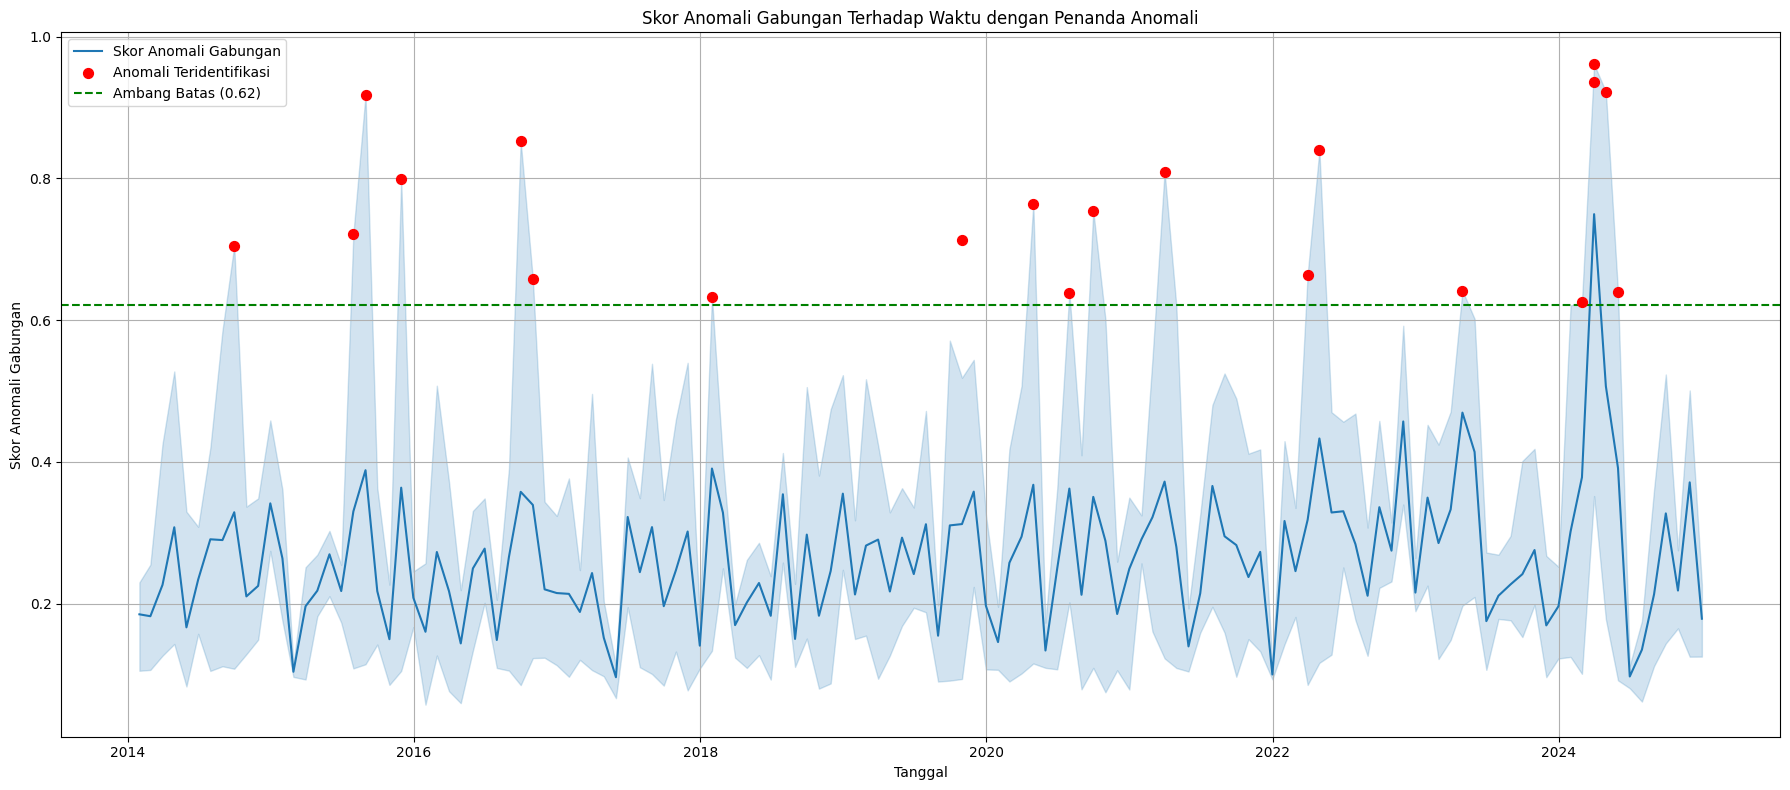

In [15]:
plt.figure(figsize=(18, 8))
sns.lineplot(x='tanggal', y='combined_anomaly_score', data=data_ano_sorted, label='Skor Anomali Gabungan')

# Perbarui data_ano_sorted agar memuat kolom 'is_anomaly' yang baru
data_ano_sorted = data_ano.sort_values(by='tanggal')

# Tandai titik-titik anomali pada grafik
anomalies = data_ano_sorted[data_ano_sorted['is_anomaly']]
plt.scatter(anomalies['tanggal'], anomalies['combined_anomaly_score'], color='red', s=50, zorder=5, label='Anomali Teridentifikasi')

plt.axhline(y=anomaly_threshold, color='green', linestyle='--', label=f'Ambang Batas ({anomaly_threshold:.2f})')

plt.title('Skor Anomali Gabungan Terhadap Waktu dengan Penanda Anomali')
plt.xlabel('Tanggal')
plt.ylabel('Skor Anomali Gabungan')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 14. Visualisasi Demand ('terjual') Terhadap Waktu dengan Penanda Anomali

Plot ini akan menunjukkan jumlah unit terjual (`terjual`) dari waktu ke waktu, dengan titik-titik yang teridentifikasi sebagai anomali ditandai secara khusus. Ini membantu kita melihat pola anomali dalam konteks volume penjualan.

**Reasoning**:
Following the markdown introduction for visualizing demand against time with anomaly markers, the next step is to provide the Python code to generate this plot. This involves plotting the 'terjual' (demand) over 'tanggal' and overlaying the identified anomalies.



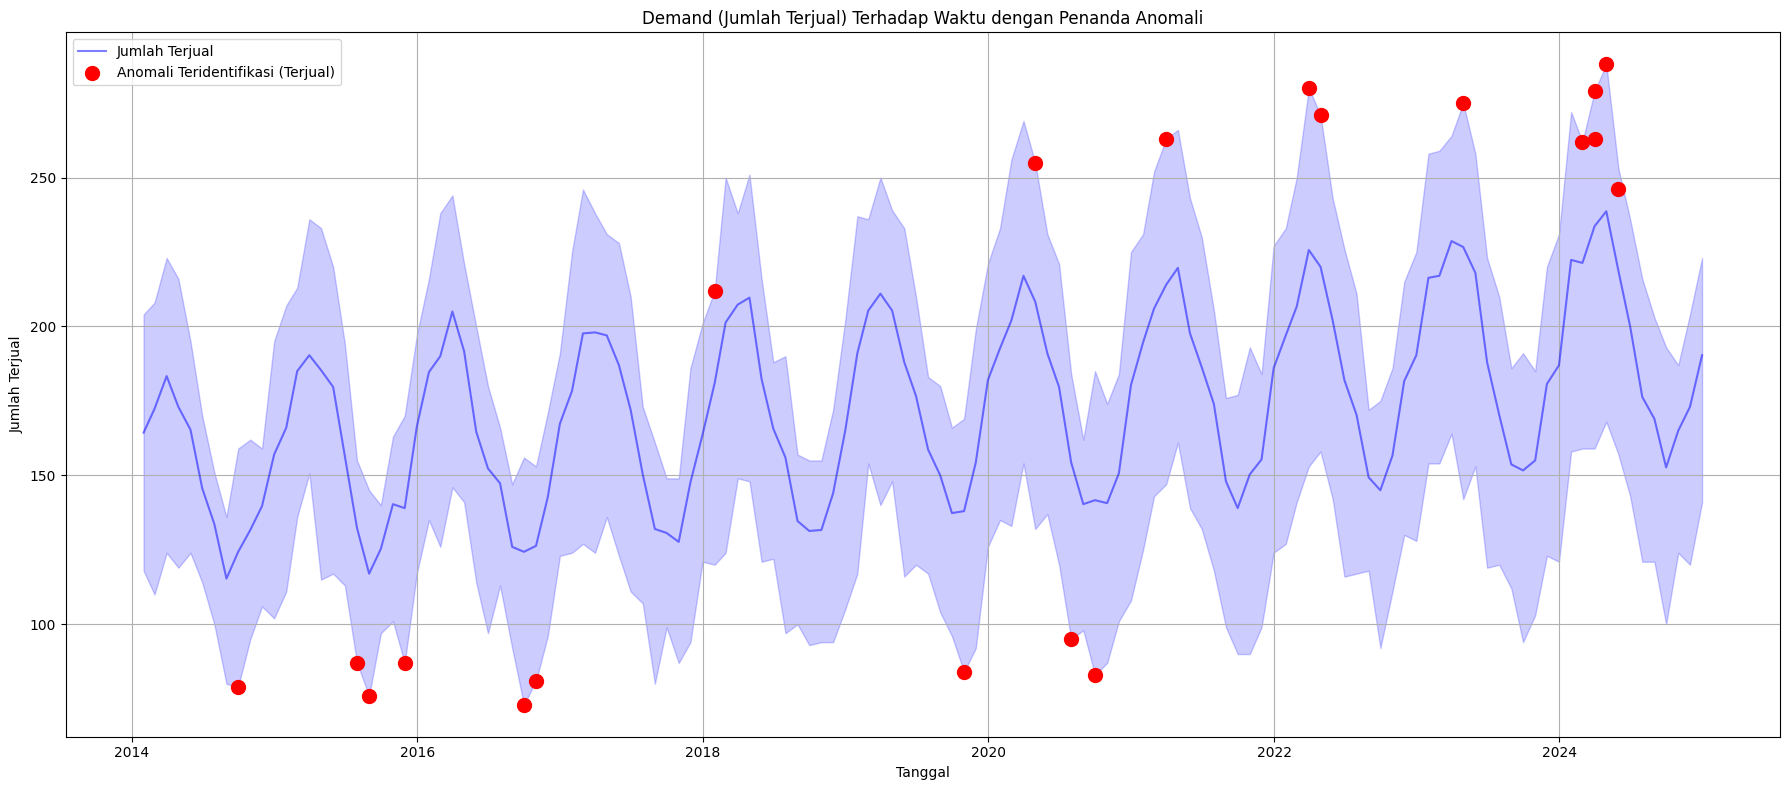

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom 'tanggal' bertipe datetime dan data_ano_sorted diperbarui
data_ano['tanggal'] = pd.to_datetime(data_ano['tanggal'])
data_ano_sorted = data_ano.sort_values(by='tanggal')

plt.figure(figsize=(18, 8))

sns.lineplot(x='tanggal', y='terjual', data=data_ano_sorted, label='Jumlah Terjual', color='blue', alpha=0.5)

# Tandai titik-titik anomali pada grafik
anomalies_demand = data_ano_sorted[data_ano_sorted['is_anomaly']]
plt.scatter(
    anomalies_demand['tanggal'],
    anomalies_demand['terjual'],
    color='red',
    s=100,
    marker='o',
    zorder=5,
    label='Anomali Teridentifikasi (Terjual)'
)

plt.title('Demand (Jumlah Terjual) Terhadap Waktu dengan Penanda Anomali')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Terjual')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Data Preparation:** The analysis began by loading the retail sales dataset (`dataset_retail_2014_2024.csv`), which contains 396 rows. Key features ('terjual', 'stok_awal', 'harga') were scaled using `StandardScaler` after confirming no missing values.
*   **Anomaly Scoring:** Anomaly scores were generated using a combination of K-Means clustering (with an optimal number of clusters determined by the elbow method) and Isolation Forest. The distances from K-Means centroids and Isolation Forest scores were linearly combined into a `combined_anomaly_score` for each data point.
*   **Anomaly Identification:**
    *   The most 'normal' data points exhibited `combined_anomaly_score` values ranging from approximately 0.057 to 0.075.
    *   The highest `combined_anomaly_score` values, indicating the most anomalous observations, ranged from 0.85 to 0.96.
    *   An anomaly threshold was established at the 95th percentile of the `combined_anomaly_score`, which was calculated to be **0.6220**.
    *   Based on this threshold, a total of **20 anomalies** were identified in the dataset.
*   **Anomaly Visualization:**
    *   The `combined_anomaly_score` was visualized over time, clearly highlighting the identified anomalous periods (scores above 0.6220) in red.
    *   A separate visualization showed the 'terjual' (demand) over time, with the 20 identified anomalous points specifically marked, allowing for direct observation of how these anomalies manifest in sales volume.

### Insights or Next Steps

*   **Investigate Specific Anomalies:** Focus on the **20 identified anomalies** (those with a `combined_anomaly_score` above 0.6220) to understand the root causes. This could involve examining external factors like promotions, competitor activities, supply chain disruptions, or data entry errors during those specific periods.
*   **Refine Anomaly Threshold:** The current threshold is statistically driven (95th percentile). Collaborate with domain experts to validate if this threshold aligns with business understanding of what constitutes a "true" anomaly or explore dynamic thresholding methods for better real-time detection.


### 15. Visualisasi Distribusi Skor Anomali Gabungan (Histogram)

Visualisasi ini akan menunjukkan distribusi frekuensi dari `combined_anomaly_score`. Histogram ini akan membantu kita memahami sebaran skor anomali, berapa banyak observasi yang memiliki skor rendah (normal) dan berapa banyak yang memiliki skor tinggi (potensi anomali), serta bagaimana ambang batas anomali yang telah ditentukan membagi distribusi ini.

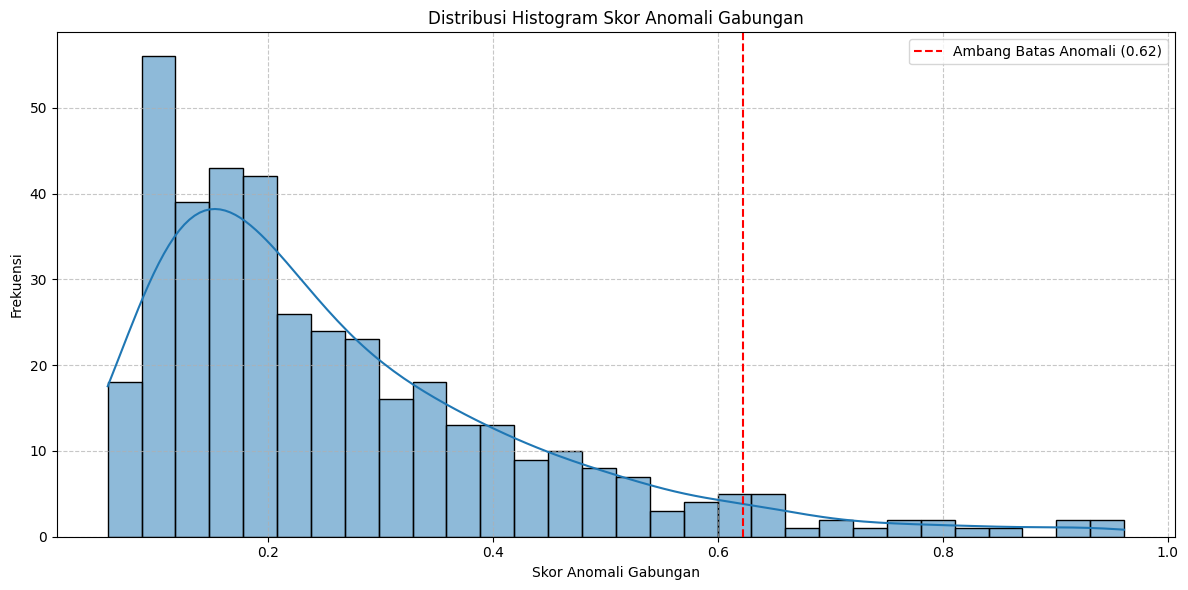

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_ano['combined_anomaly_score'], bins=30, kde=True)
plt.axvline(x=anomaly_threshold, color='red', linestyle='--', label=f'Ambang Batas Anomali ({anomaly_threshold:.2f})')
plt.title('Distribusi Histogram Skor Anomali Gabungan')
plt.xlabel('Skor Anomali Gabungan')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()